In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
#load dataset
filename = 'filtered_rechtspraak_en.csv'  
law_dataset = pd.read_csv(filename)

#add age variable
law_dataset['age'] = 2024 - law_dataset['geboren']

In [3]:
sum_table = law_dataset.describe()
print(sum_table)

                  id       geboren  commasinjurors   aantalzaken  \
count   15579.000000  15579.000000    14076.000000  15579.000000   
mean    58869.691765   1989.609474        1.868713      1.610566   
std     42490.740716    173.679089        0.489563      5.367926   
min        13.000000      0.000000        0.000000      0.000000   
25%     23249.000000   1972.000000        2.000000      0.000000   
50%     49902.000000   1985.000000        2.000000      0.000000   
75%     89587.000000   1995.000000        2.000000      3.000000   
max    141872.000000   9303.000000        7.000000    435.000000   

          is_guilty  plural_court  jailsentence           age  
count  15579.000000  15579.000000  15579.000000  15579.000000  
mean       0.743308      0.953656      0.755183     34.390526  
std        0.436822      0.210237      0.429992    173.679089  
min        0.000000      0.000000      0.000000  -7279.000000  
25%        0.000000      1.000000      1.000000     29.000000  
50%

In [4]:
law_dataset.head()

,id,urlshort,verdachte,geboren,beslissing,strafmaat,zittingsplaats,namenvandejuryleden,commasinjurors,aantalzaken,is_guilty,plural_court,jailsentence,verdachte_en,beslissing_en,strafmaat_en,age
0,13,RBMNE:2024:2414&showbutton=true,"geboren op [1987] te [geboorteplaats] , wonend...",1987,De rechtbank: Bewezenverklaring - verklaart he...,4 (vier) jaar/ proeftijd van 5 (vijf) jaar vas...,Lelystad,"J.W.B. Snijders Blok, R.P.P. Hoekstra, A.M. Loots",2.0,3,1,1,1,"born [1987] at [birthplace] , residing at [add...",The court: Provenance - declares that the defe...,4 (four) year/ probationary period of 5 (five)...,37
1,16,RBMNE:2024:2381&showbutton=true,geboren op [geboortedatum 1] 1979 te [geboorte...,1979,De rechtbank: Vrijspraak  verklaart het onder...,"2, 3 en 5/ 360 dagen/ 87 dagen/ Bijlage I: de ...",Utrecht,"H.A. Brouwer, J. Edgar, L.C. Michon",2.0,5,1,1,1,born on [birth date 1] 1979 at [birthplace 1] ...,The court: An acquittal shall not prove the ac...,"2, 3 and 5/ 360 days/ 87 days/ Annex I: The ch...",45
2,17,RBZWB:2024:2543&showbutton=true,geboren op [geboortedag 1] 1989 te [geboortepl...,1989,De rechtbank: Bewezenverklaring - verklaart he...,"een gevangenisstraf van zeven maanden, waarvan...",Breda,"K. Verschueren, W.A.H.A. Schnitzler-Strijbos, ...",2.0,4,1,1,1,born on [birthday 1] 1989 at [birthplace 1] re...,The court: Prove - declares the evidence indic...,"a sentence of seven months, of which three mon...",35
3,18,RBZWB:2024:2544&showbutton=true,"geboren op [geboortedag] 1987, te [geboortepla...",1987,De rechtbank: Vrijspraak: - spreekt verdachte ...,"betaling van een geldboete van € 1.500,=/ verv...",Breda,"M.E.I. Beudeker, M. van de Wetering, D.S.G. Fr...",2.0,4,1,1,1,"born on [birthday] 1987, at [birthplace] , wit...",The court: Acquittal: - exonerates suspect fro...,"payment of a fine of €1,500,=/ replacement det...",37
4,20,RBZWB:2024:2547&showbutton=true,", geboren op [geboortedag] 1980, te [geboortep...",1980,De rechtbank: Vrijspraak - spreekt verdachte v...,"spreekt verdachte vrij/ [benadeelde 3] , [bena...",Breda,"D.L.J. Martens, M.E.I. Beudeker, F.L. Donders",2.0,0,0,1,0,", born [birthday] 1980, born [birthplace] , re...",The court: Acquittal - exonerates suspect from...,"exonerates suspect/ [disadvantaged 3] , [disad...",44


In [5]:
law_dataset['is_guilty'].value_counts()

1    11580
0     3999
Name: is_guilty, dtype: int64

In [6]:
#remove unneccesary columns
law_data_clean = law_dataset.drop(columns = ['id', 'urlshort', 'verdachte', 'geboren', 'beslissing', 'strafmaat', 'namenvandejuryleden', 'commasinjurors', 'verdachte_en', 'beslissing_en', 'strafmaat_en'])

In [7]:
#rename columns to English terms
law_data_clean = law_data_clean.rename(columns = {"aantalzaken": "amount_of_cases", "zittingsplaats": "courtcity"})

In [8]:
#remove rows with ages below 0 and above 100, since these are infeasible datapoints
law_data_clean = law_data_clean[law_data_clean['age'].between(18,100)]
law_data_clean.count()
#15.579 - 14.961 = 618 rows dropped

courtcity          14961
amount_of_cases    14961
is_guilty          14961
plural_court       14961
jailsentence       14961
age                14961
dtype: int64

In [9]:
law_data_clean['age'].describe()

count    14961.000000
mean        41.817325
std         14.890347
min         18.000000
25%         30.000000
50%         40.000000
75%         52.000000
max         97.000000
Name: age, dtype: float64

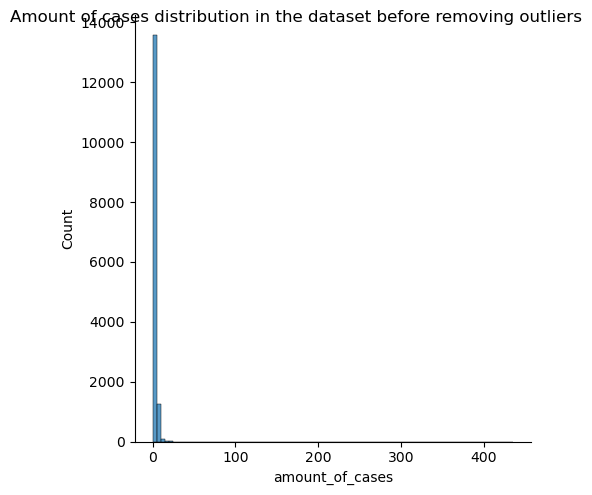

In [10]:
#plot the age distribution in the dataset
plot = sns.displot(law_data_clean, x="amount_of_cases", binwidth=5)
plot.fig.suptitle('Amount of cases distribution in the dataset before removing outliers')

plot.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/amount_cases_distribution_before_outliers.png')

In [11]:
#remove outliers from the amount_of_cases variable using z-scores
law_data_clean['amount_of_cases'].describe()

#calculate Q1 and Q3, to use to define boundaries
Q1 = np.percentile(law_data_clean['amount_of_cases'], 25, method='midpoint')
Q3 = np.percentile(law_data_clean['amount_of_cases'], 75, method='midpoint')
IQR = Q3 - Q1

low_bound = Q1 - 1.5*IQR
up_bound = Q3 + 1.5*IQR

#remove amount of cases < 0
law_data_clean = law_data_clean[law_data_clean['amount_of_cases'].between(0,100)]
law_data_clean.count()
#15526 - 15524 = 2 cases dropped

#assess which values of amount_of_cases exceed the outlier boundary
outlier_upper = np.where(law_data_clean['amount_of_cases'] >= up_bound)[0]
outlier_lower = np.where(law_data_clean['amount_of_cases'] <= low_bound)[0]

#check which indices are not in the dataset
missing = [i for i in outlier_upper if i not in law_data_clean.index]
outlier_upper = outlier_upper[~np.isin(outlier_upper, missing)]

# #see how many outliers will be removed
print(len(outlier_upper))
print(len(outlier_lower))

250
0


In [12]:
#removing outliers from the dataset (lower bound has no outliers)
law_data_clean.drop(index=outlier_upper, inplace=True)

In [13]:
law_data_clean['amount_of_cases'].describe()

count    14709.000000
mean         1.592154
std          2.177317
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         24.000000
Name: amount_of_cases, dtype: float64

In [14]:
law_data_clean['courtcity'].value_counts()

#drop rows where courtcity is missing

law_data_clean = law_data_clean[law_data_clean['courtcity'] != '.']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'de']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'te']
law_data_clean = law_data_clean[law_data_clean['courtcity'] != 'Rechtbank']

law_data_clean.describe()

,amount_of_cases,is_guilty,plural_court,jailsentence,age
count,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000
mean,1.958561,0.818472,0.979532,0.824092,40.632078
std,2.261836,0.385472,0.141601,0.380758,14.141312
min,0.000000,0.000000,0.000000,0.000000,18.000000
25%,0.000000,1.000000,1.000000,1.000000,29.000000
50%,2.000000,1.000000,1.000000,1.000000,38.000000
75%,3.000000,1.000000,1.000000,1.000000,51.000000
max,24.000000,1.000000,1.000000,1.000000,96.000000


In [15]:
#one-hot encoding courtcity
law_data_clean_enc = pd.get_dummies(law_data_clean, columns=['courtcity'], drop_first=True)

law_data_clean_enc.head()

,amount_of_cases,is_guilty,plural_court,jailsentence,age,courtcity_Amsterdam,courtcity_Arnhem,courtcity_Assen,courtcity_Breda,courtcity_Groningen,courtcity_Lelystad,courtcity_Maastricht,courtcity_Middelburg,courtcity_Roermond,courtcity_Rotterdam,courtcity_Schiphol,courtcity_Utrecht,courtcity_Zutphen,courtcity_Zwolle
0,3,1,1,1,37,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,5,1,1,1,45,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,4,1,1,1,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,1,1,1,37,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [16]:
law_data_clean['courtcity'].value_counts()

Breda         2182
Zwolle        1868
Utrecht       1786
Almelo        1552
Arnhem        1407
Lelystad       901
Zutphen        849
Middelburg     689
Maastricht     329
Roermond       324
Amsterdam       26
Rotterdam        4
Schiphol         2
Assen            1
Groningen        1
Name: courtcity, dtype: int64

In [17]:
law_data_clean_enc.describe()

,amount_of_cases,is_guilty,plural_court,jailsentence,age,courtcity_Amsterdam,courtcity_Arnhem,courtcity_Assen,courtcity_Breda,courtcity_Groningen,courtcity_Lelystad,courtcity_Maastricht,courtcity_Middelburg,courtcity_Roermond,courtcity_Rotterdam,courtcity_Schiphol,courtcity_Utrecht,courtcity_Zutphen,courtcity_Zwolle
count,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.000000,11921.00000,11921.000000,11921.000000
mean,1.958561,0.818472,0.979532,0.824092,40.632078,0.002181,0.118027,0.000084,0.183038,0.000084,0.075581,0.027598,0.057797,0.027179,0.000336,0.000168,0.14982,0.071219,0.156698
std,2.261836,0.385472,0.141601,0.380758,14.141312,0.046652,0.322654,0.009159,0.386714,0.009159,0.264337,0.163826,0.233369,0.162611,0.018316,0.012952,0.35691,0.257201,0.363531
min,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,3.000000,1.000000,1.000000,1.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,24.000000,1.000000,1.000000,1.000000,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


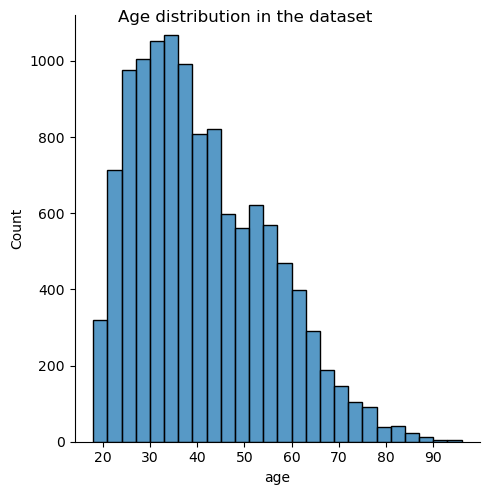

In [18]:
#plot the age distribution in the dataset
plot = sns.displot(law_data_clean_enc, x="age", binwidth=3)
plot.fig.suptitle('Age distribution in the dataset')

plot.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/age_distribution.png')

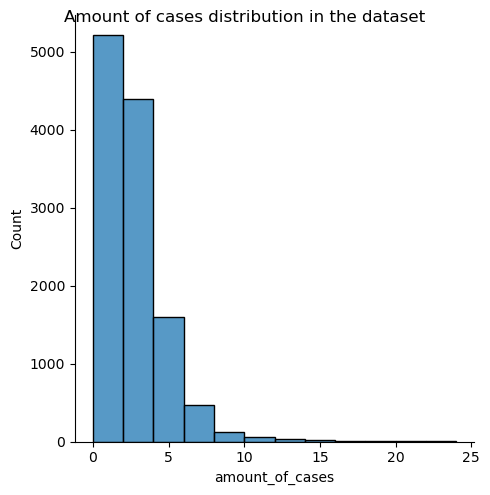

In [19]:
#plot the age distribution in the dataset
plot = sns.displot(law_data_clean_enc, x="amount_of_cases", binwidth=2)
plot.fig.suptitle('Amount of cases distribution in the dataset')

plot.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/amount_cases_distribution.png')

In [20]:
#see how many jailsentences and not going to jail are in the dataset
law_data_clean_enc['jailsentence'].value_counts()

1    9824
0    2097
Name: jailsentence, dtype: int64

In [21]:
#see how many plural and singular courts are in the dataset
law_data_clean_enc['plural_court'].value_counts()

1    11677
0      244
Name: plural_court, dtype: int64

In [22]:
crosstable = pd.crosstab(law_data_clean_enc['is_guilty'], law_data_clean_enc['jailsentence'])

print(crosstable)


jailsentence     0     1
is_guilty               
0             1228   936
1              869  8888


In [23]:
law_data_clean_enc = law_data_clean_enc[~((law_data_clean_enc['jailsentence'] == 1) & (law_data_clean_enc['is_guilty'] == 0))]

In [35]:
law_data_clean_enc['jailsentence'].value_counts()

1    8888
0    2097
Name: jailsentence, dtype: int64

In [25]:
predictor_var = 'jailsentence'

#create different variables for predictor and predicted variables
X = law_data_clean_enc.drop(columns=[predictor_var])
y = law_data_clean_enc[predictor_var]

In [26]:
#split data in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
#Train and test a logistic regression model
model_LR = LogisticRegression(max_iter=1000)
model_LR.fit(X_train, y_train)

# Predict on test set
y_pred_LR = model_LR.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_LR))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_LR))

Accuracy: 0.9223300970873787

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.57      0.73       595
           1       0.91      1.00      0.95      2701

    accuracy                           0.92      3296
   macro avg       0.96      0.78      0.84      3296
weighted avg       0.93      0.92      0.91      3296



In [28]:
#train and test a decision tree model
model_DT = DecisionTreeClassifier(random_state=42)
model_DT.fit(X_train, y_train)

# Predict on test set
y_pred_DT = model_DT.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_DT))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_DT))

Accuracy: 0.8995752427184466

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.63      0.69       595
           1       0.92      0.96      0.94      2701

    accuracy                           0.90      3296
   macro avg       0.85      0.79      0.82      3296
weighted avg       0.89      0.90      0.90      3296



In [29]:
#train and test a random forest algorithm
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# Predict on test data
y_pred_RF = model_RF.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred_RF))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_RF))


Accuracy: 0.9180825242718447

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.74       595
           1       0.92      0.98      0.95      2701

    accuracy                           0.92      3296
   macro avg       0.90      0.81      0.84      3296
weighted avg       0.92      0.92      0.91      3296



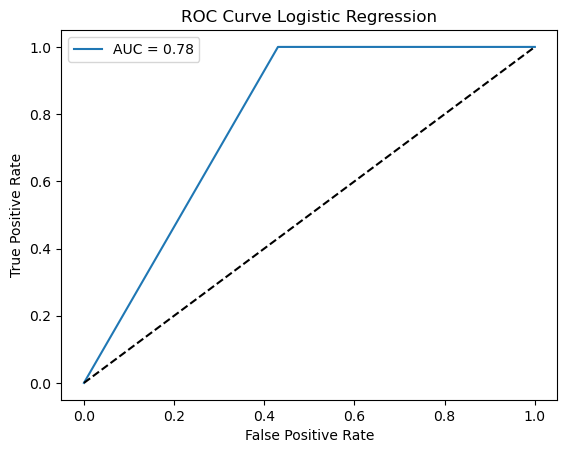

<Figure size 640x480 with 0 Axes>

In [30]:
#create ROC curve for Logistic Regression model
fpr, tpr, _ = roc_curve(y_test, y_pred_LR)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Logistic Regression")
plt.legend()
plt.show()
plt.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/ROC_Log_reg.png')

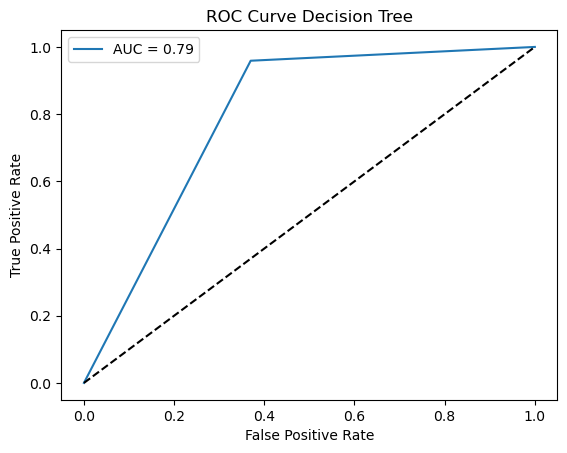

<Figure size 640x480 with 0 Axes>

In [31]:
fpr_DT, tpr_DT, _ = roc_curve(y_test, y_pred_DT)
roc_auc = auc(fpr_DT, tpr_DT)

plt.figure()
plt.plot(fpr_DT, tpr_DT, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Decision Tree")
plt.legend()
plt.show()
plt.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/ROC_dec_tree.png')

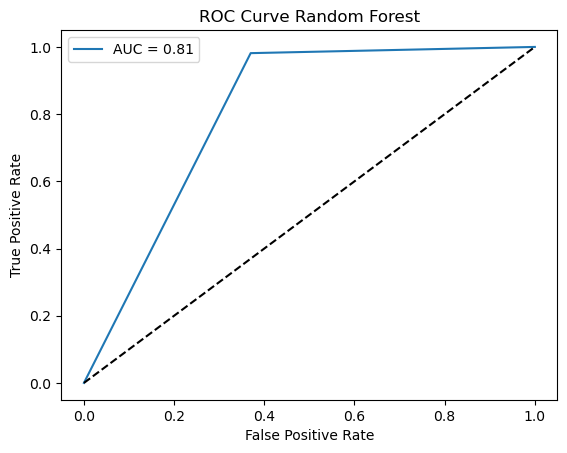

<Figure size 640x480 with 0 Axes>

In [32]:
fpr_RF, tpr_RF, _ = roc_curve(y_test, y_pred_RF)
roc_auc = auc(fpr_RF, tpr_RF)

plt.figure()
plt.plot(fpr_RF, tpr_RF, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Random Forest")
plt.legend()
plt.show()
plt.savefig('C:/Users/20202300/OneDrive - TU Eindhoven/Documents/Eindhoven2/0HM270 Supercrunchers/Data assignment/ROC_Random_forest.png')